## Step 1: Getting the Data

In [1]:
import tensorflow as tf

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data", one_hot = True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py fr

In [3]:
type(mnist)

tensorflow.contrib.learn.python.learn.datasets.base.Datasets

In [4]:
mnist.train.images

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [5]:
mnist.validation.images

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [6]:
mnist.train.num_examples

55000

In [7]:
mnist.test.num_examples

10000

In [8]:
mnist.validation.num_examples

5000

## Step 2: Visualizing the Data

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
mnist.train.images.shape

(55000, 784)

In [11]:
mnist.train.images[567]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [12]:
my_img = mnist.train.images[567].reshape(28, 28)

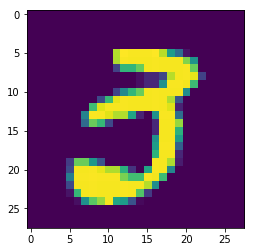

In [13]:
plt.imshow(my_img)

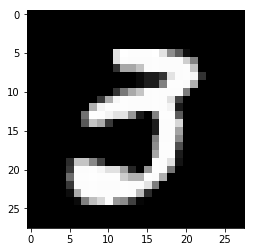

In [14]:
plt.imshow(my_img, cmap="gist_gray")

In [15]:
my_img.min()

0.0

In [16]:
my_img.max()

1.0

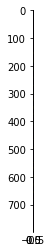

In [17]:
my_img2 = mnist.train.images[567].reshape(784,1)
plt.imshow(my_img2)

## Step 3: Creating out NN Model

1. Placeholders - 
2. Variables - 
3. Create out Computation Graph Operation - 
4. Loss Function - 
5. Optimixer - 
6. Create and run the session

In [18]:
x = tf.placeholder(tf.float32, shape=[None, 784])

In [19]:
# Weights, Bias 
W = tf.Variable(tf.zeros([784,10]))
b = tf.Variable(tf.zeros([10]

# Create the graph 
y = tf.matmul(x, W) + b

In [22]:
y_true = tf.placeholder(tf.float32, shape = [None, 10])

In [ ]:
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels = y_true, logits = y))

In [25]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.5)

In [ ]:
train = optimizer.minimize(cross_entropy)

In [27]:
init = tf.global_variables_initializer()

In [ ]:
# Create and run Session 

with tf.Session() as sess:
    sess.run(init)
    
    # Train for say 10000 steps
    for step in range(10000):
        batch_x, batch_y = mnist.train.next_batch(100)
        sess.run(train, feed_dict = {x:batch_x, y_true:batch_y})
        
    #evaluate test train model 
    matches = tf.equal(tf.arg_max(y,1), tf.argmax(y_true, 1))
    accuracy = tf.reduce_mean(tf.cast(matches, tf.float32))
    print(sess.run(accuracy,feed_dict={x:mnist.text.images, y_true:mnist.text.labels}))
        